In [1]:
import sqlite3
import pandas as pd
import folium
import matplotlib.pylab as plt
from scipy.cluster.vq import kmeans2, whiten

from scripts import write_weather_data
from utils import weather

conn = sqlite3.connect(r'locations.db')
df_weather = pd.read_sql_query("SELECT Weather.id, min_temp, max_temp, mean_temp, City.city_id, timestamp, name, \
                               City.country_id, City.lat,City.lon, City.altitude \
                               FROM Weather JOIN City ON (Weather.city_id=City.city_id)", conn)
df_city = pd.read_sql_query("Select City.name, city_id, lat, lon, altitude, Country.name as CountryName, Continent.name as ContinentName from City \
                            Join Country ON (City.country_id=Country.id) \
                            JOIN Continent ON (Country.continent_id=Continent.id)"
                            , conn)

df_all = pd.concat([df_weather, df_city])

In [3]:
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

In [4]:
continent_colors = {
    'Asia': 'red',
    'Africa': 'blue',
    'Oceania': 'orange',
    'Europe': 'pink',
    'North America': 'green',
    'South America': 'lightred'
}

In [5]:
for city in write_weather_data.city_list:
    target_city = df_city.get(df_city['name']== city)
    icon_color = continent_colors[target_city.ContinentName.iloc[0]]
    folium.Marker(location=[target_city['lat'], target_city['lon']],
                icon=folium.Icon(color=icon_color, icon="info-sign"),
                popup=target_city.name.iloc[0]).add_to(m)
    


In [6]:
m

In [7]:
df_mean_values_cities = df_weather.groupby('name').mean()
df_mean_values_cities

,id,min_temp,max_temp,mean_temp,city_id,country_id,lat,lon,altitude
name,,,,,,,,,
Arizona City,840.50,2.581667,19.803333,11.192500,5551665.0,2.0,32.755890,-111.67096,99.0
Auckland,780.50,14.753333,23.481667,19.117500,2193733.0,19.0,-36.866670,174.76667,26.0
Bangkok,600.50,22.508333,31.746667,27.127500,1609350.0,47.0,13.753980,100.50144,2.0
Beijing,615.50,-10.148333,3.836667,-3.155833,1816670.0,69.0,39.907500,116.39723,63.0
Bogota,923.00,8.085000,19.666667,13.875833,3688689.0,100.0,4.609700,-74.08180,2620.0
Bologna,720.50,1.621667,7.455000,4.538333,3181928.0,1.0,44.493810,11.33875,54.0
Canberra,765.50,11.905000,26.788333,19.346667,2172517.0,71.0,-35.283460,149.12807,609.0
Cape Town,645.50,16.813333,26.898333,21.855833,3369157.0,57.0,-33.925840,18.42322,7.0
Caracas,870.50,23.308333,30.166667,26.737500,3646738.0,54.0,10.488010,-66.87919,920.0


<AxesSubplot:xlabel='name'>

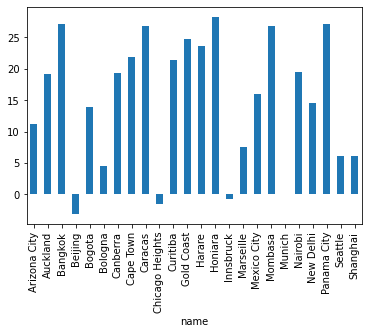

In [8]:
df_mean_values_cities['mean_temp'].plot.bar()

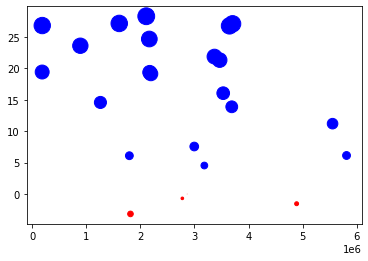

In [9]:
# Average value for the MEAN temp for each location.

df_mean_values_cities.dropna()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
df_mean_values_cities_positive = df_mean_values_cities[df_mean_values_cities.mean_temp > 0]
df_mean_values_cities_negative = df_mean_values_cities[df_mean_values_cities.mean_temp < 0]
ax.scatter(df_mean_values_cities_positive.city_id,
           df_mean_values_cities_positive.mean_temp,
           color='b',
           s=df_mean_values_cities_positive['mean_temp']* 10)
ax.scatter(df_mean_values_cities_negative.city_id,
            df_mean_values_cities_negative.mean_temp, color='r', s=df_mean_values_cities_negative['mean_temp']*-10);
ax.autoscale()
plt.show()


<AxesSubplot:>

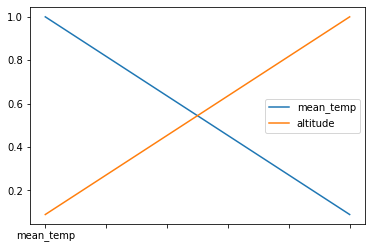

In [10]:
# Relation between MEAN temperature and Altitude.

relation_mean_altitude = df_weather[['mean_temp', 'altitude']].corr()
relation_mean_altitude.plot()